# Proyect 2

### Imports

In [41]:
# Make imports
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# download word packages
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Data Cleaning

In [42]:
# Lectura del archivo
datos = pd.read_csv('spam-2.csv', encoding='iso-8859-2')
# Get just the columns that has some values
datos = datos[["v1", "v2"]]
# Rename columns
datos = datos.rename(columns={"v1": "category", "v2": "message"})
# Convert to minus letters and filter not character
datos["message"] = datos["message"].apply(lambda x: re.sub(r'[^a-zA-Z ]', '', x.lower()))
# Get the words splitted with the tokenize function
datos["words"] = datos["message"].apply(lambda x: nltk.tokenize.word_tokenize(x))
# Get the amount of words per message
datos["amountWords"] = datos["words"].apply(lambda x: len(x))
datos.head()

,category,message,words,amountWords
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",20
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",6
2,spam,free entry in a wkly comp to win fa cup final...,"[free, entry, in, a, wkly, comp, to, win, fa, ...",25
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...",11
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...",13


### Delete tokens with any symbol that is not a character

In [43]:
datos["words"] = datos["words"].apply(lambda x: [word for word in x if not re.search(r'(\W+)', word)])
datos

,category,message,words,amountWords
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",20
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",6
2,spam,free entry in a wkly comp to win fa cup final...,"[free, entry, in, a, wkly, comp, to, win, fa, ...",25
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...",11
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...",13
...,...,...,...,...
5567,spam,this is the nd time we have tried contact u u...,"[this, is, the, nd, time, we, have, tried, con...",26
5568,ham,will b going to esplanade fr home,"[will, b, going, to, esplanade, fr, home]",7
5569,ham,pity was in mood for that soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...",9
5570,ham,the guy did some bitching but i acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...",26


### Delete Stop Words

In [44]:
stop = nltk.corpus.stopwords.words('english')
datos["words"] = datos["words"].apply(lambda x: [word for word in x if word not in (stop)])
datos

,category,message,words,amountWords
0,ham,go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...",20
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",6
2,spam,free entry in a wkly comp to win fa cup final...,"[free, entry, wkly, comp, win, fa, cup, final,...",25
3,ham,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]",11
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...",13
...,...,...,...,...
5567,spam,this is the nd time we have tried contact u u...,"[nd, time, tried, contact, u, u, pound, prize,...",26
5568,ham,will b going to esplanade fr home,"[b, going, esplanade, fr, home]",7
5569,ham,pity was in mood for that soany other suggest...,"[pity, mood, soany, suggestions]",9
5570,ham,the guy did some bitching but i acted like id ...,"[guy, bitching, acted, like, id, interested, b...",26


## Exploratory Analysis

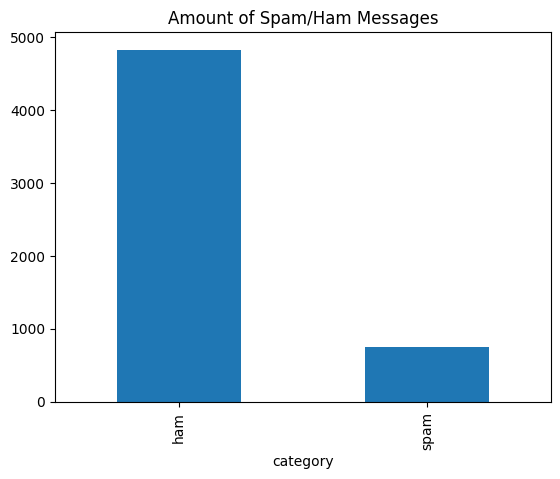

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
ham,4825.0,13.810570,11.047508,0.0,7.0,10.0,18.0,171.0
spam,747.0,21.172691,5.479761,1.0,19.0,22.0,25.0,32.0


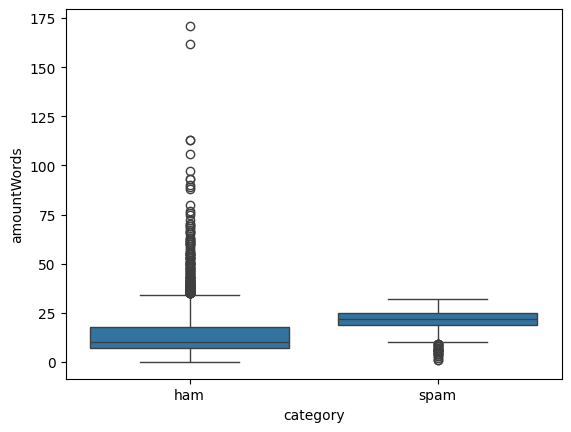

In [45]:
# Amount of ham and spam
datos.groupby(["category"])["category"].count().plot(kind = 'bar')
plt.title("Amount of Spam/Ham Messages")
plt.show()
# plot amount of words by ham or spam
sns.boxplot(x="category", y="amountWords", data=datos)
datos.groupby(["category"])["amountWords"].describe()

## Model

### Divide between train & test

In [46]:
train, test = train_test_split(datos.copy(), test_size=0.20, stratify=datos['category'], random_state=42)
train.head()
test.head()

,category,message,words,amountWords
2826,ham,oh right ok ill make sure that i do loads of w...,"[oh, right, ok, ill, make, sure, loads, work, ...",32
3695,ham,i am in tirupur call you da,"[tirupur, call, da]",7
3906,ham,no that just means you have a fat head,"[means, fat, head]",9
575,spam,you have won cash or a prize to claim call,"[cash, prize, claim, call]",10
2899,ham,come aftr ltdecimalgt now i m cleaning the house,"[come, aftr, ltdecimalgt, cleaning, house]",9


### Lemmatization

In [47]:
lemmatizer = nltk.stem.WordNetLemmatizer()
train["words"] = train["words"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
train

,category,message,words,amountWords
184,ham,going on nothing greatbye,"[going, nothing, greatbye]",4
2171,ham,i wont so wats wit the guys,"[wont, wats, wit, guy]",7
5422,ham,ok ksry i knw sivatats y i askd,"[ok, ksry, knw, sivatats, askd]",8
4113,ham,where are you what do you do how can you sta...,"[stand, away, doesnt, heart, ache, without, do...",31
4588,ham,have you not finished work yet or something,"[finished, work, yet, something]",8
...,...,...,...,...
1932,ham,jus finished avatar nigro,"[jus, finished, avatar, nigro]",4
5316,ham,jus finish watching tv u,"[jus, finish, watching, tv, u]",5
2308,spam,moby pub quizwin a high street prize if u kno...,"[moby, pub, quizwin, high, street, prize, u, k...",27
1903,spam,free entry in a weekly comp for a chance to w...,"[free, entry, weekly, comp, chance, win, ipod,...",26


### Stemming

In [48]:
ps = nltk.stem.PorterStemmer()
train["words"] = train["words"].apply(lambda x: [ps.stem(word) for word in x])
train

,category,message,words,amountWords
184,ham,going on nothing greatbye,"[go, noth, greatby]",4
2171,ham,i wont so wats wit the guys,"[wont, wat, wit, guy]",7
5422,ham,ok ksry i knw sivatats y i askd,"[ok, ksri, knw, sivatat, askd]",8
4113,ham,where are you what do you do how can you sta...,"[stand, away, doesnt, heart, ach, without, don...",31
4588,ham,have you not finished work yet or something,"[finish, work, yet, someth]",8
...,...,...,...,...
1932,ham,jus finished avatar nigro,"[ju, finish, avatar, nigro]",4
5316,ham,jus finish watching tv u,"[ju, finish, watch, tv, u]",5
2308,spam,moby pub quizwin a high street prize if u kno...,"[mobi, pub, quizwin, high, street, prize, u, k...",27
1903,spam,free entry in a weekly comp for a chance to w...,"[free, entri, weekli, comp, chanc, win, ipod, ...",26


### Dictionaries

In [49]:
spamDictionary = {}
hamDictionary = {}
for x in range(0, train.count()[0]):
    # Convert to a set to avoid duplicates because we want to count if it shows up in the text not how many times does it shows up
    wordsNotDuplicated = train.iloc[x].iloc[2]
    isSpamOrHam = train.iloc[x].iloc[0]
    for word in wordsNotDuplicated:
        if word not in list(hamDictionary.keys()):
            hamDictionary[word]=0
        if word not in list(spamDictionary.keys()):
            spamDictionary[word]=0
        if isSpamOrHam=='ham':
            hamDictionary[word]+=1
        else:
            spamDictionary[word]+=1

/tmp/ipykernel_71267/715581307.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for x in range(0, train.count()[0]):


### Top Words in Spam

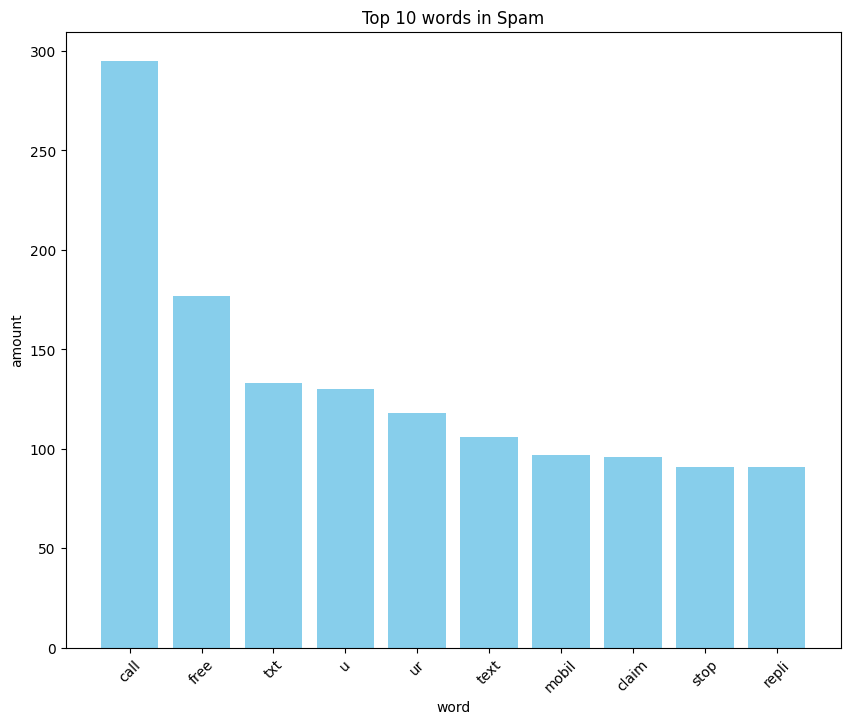

In [50]:
sorted_spam_words = sorted(spamDictionary.items(), key=lambda item: item[1], reverse=True)[:10]
words, counts = zip(*sorted_spam_words)  # Desempaquetar en listas separadas

# Crear la gráfica de barras
plt.figure(figsize=(10, 8))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 words in Spam')
plt.xlabel('word')
plt.ylabel('amount')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

### Top Words in Ham

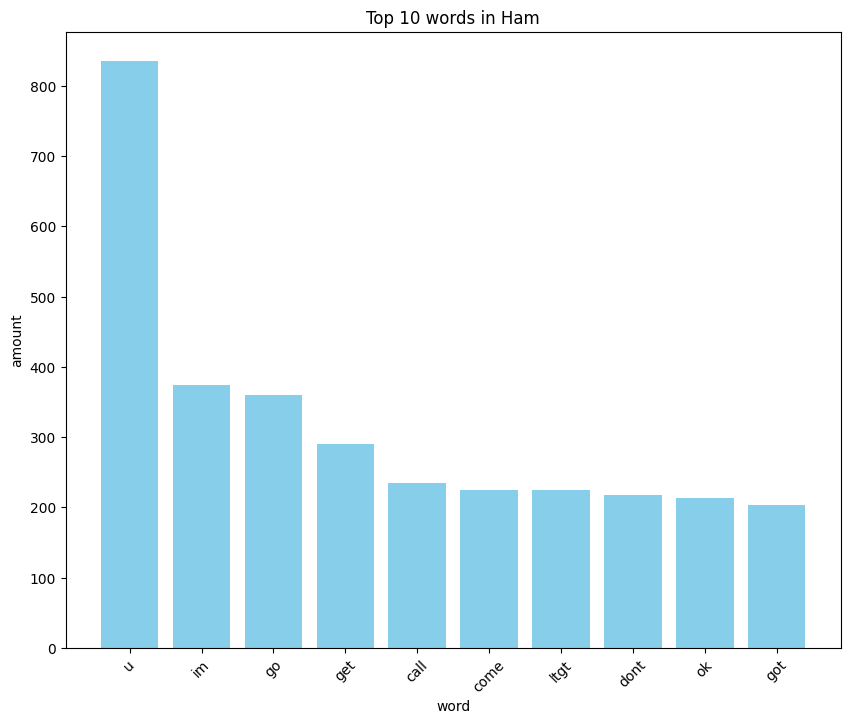

In [51]:
sorted_ham_words = sorted(hamDictionary.items(), key=lambda item: item[1], reverse=True)[:10]
words, counts = zip(*sorted_ham_words)  # Desempaquetar en listas separadas

# Crear la gráfica de barras
plt.figure(figsize=(10, 8))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 words in Ham')
plt.xlabel('word')
plt.ylabel('amount')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

### Probability calculus

In [52]:
# Probability that a text is a ham/spam
pHam = train[train["category"]=='ham']['category'].count()/train['category'].count()
pSpam = train[train["category"]=='spam']['category'].count()/train['category'].count()
# Dictionary for probabilities that a text is a Spam/Ham given a word
pTextGivenWord = {}
# Probabilities for a word
for key in list(hamDictionary.keys()):
    # Probability that a word shows up in ham given is ham
    pWH = hamDictionary[key]/pHam
    # Probability that a word shows up in spma given is spam
    pWS = spamDictionary[key]/pSpam
    # Probability that is spam given a word
    pTextGivenWord[key] = pWS*pSpam/(pWH*pHam+pWS*pSpam)
for word in list(pTextGivenWord.keys()):
    print(word+": "+str(pTextGivenWord[word]))

go: 0.07928388746803068
noth: 0.09677419354838708
greatby: 0.0
wont: 0.06521739130434782
wat: 0.010526315789473682
wit: 0.0
guy: 0.06521739130434782
ok: 0.0184331797235023
ksri: 0.0
knw: 0.0
sivatat: 0.0
askd: 0.0
stand: 0.0
away: 0.15
doesnt: 0.0
heart: 0.08571428571428572
ach: 0.0
without: 0.0
dont: 0.08016877637130802
wonder: 0.0
crave: 0.0
finish: 0.0
work: 0.020833333333333332
yet: 0.048780487804878044
someth: 0.0
hhahhaahahah: 0.0
rofl: 0.0
wtf: 0.0
nig: 0.0
leonardo: 0.0
room: 0.031249999999999997
wot: 0.05555555555555555
u: 0.13471502590673576
j: 0.16666666666666666
hiya: 0.0
sorri: 0.015748031496062992
didnt: 0.0
hav: 0.0
signal: 0.0
havent: 0.025641025641025637
seen: 0.0
heard: 0.2727272727272727
neither: 0.0
unusu: 0.0
ill: 0.0
put: 0.03448275862068965
case: 0.0
get: 0.18309859154929578
sort: 0.0
hug: 0.0
snog: 0.0
r: 0.13076923076923078
outsid: 0.0
alreadi: 0.012987012987012986
free: 0.7797356828193833
nokia: 0.9649122807017544
motorola: 0.7999999999999999
upto: 1.0
mth: 1.

### Function to calculate a probability given a word

In [53]:
def probabilityGivenAWord(word):
    if word in list(pTextGivenWord.keys()):
        return pTextGivenWord[word]
    else:
        return 0
print(probabilityGivenAWord("u"))

0.13471502590673576


### Function to calculate a probability given a text

In [54]:
def probabilityGivenText(text):
    keys = list(spamDictionary.keys())
    if type(text)!= list:
        # Tokenize & clean text
        text = nltk.tokenize.word_tokenize(re.sub(r'[^a-zA-Z ]', '', text.lower()))
    numerator = 1
    denominator = 1
    pW = 0
    for word in text:
        # Ignore not existing words in database
        if word in keys and spamDictionary[word]!=0.0:
            pW = probabilityGivenAWord(word)
            numerator *= pW
            denominator *= (1-pW)
    denominator += numerator
    return numerator/denominator if denominator != 0 else 0

## Pruebas de Rendimiento

In [55]:
train["Prediction"] = train["words"].apply(lambda text: probabilityGivenText(text))
train

,category,message,words,amountWords,Prediction
184,ham,going on nothing greatbye,"[go, noth, greatby]",4,9.141846e-03
2171,ham,i wont so wats wit the guys,"[wont, wat, wit, guy]",7,5.177919e-05
5422,ham,ok ksry i knw sivatats y i askd,"[ok, ksri, knw, sivatat, askd]",8,1.843318e-02
4113,ham,where are you what do you do how can you sta...,"[stand, away, doesnt, heart, ach, without, don...",31,1.256560e-04
4588,ham,have you not finished work yet or something,"[finish, work, yet, someth]",8,1.089918e-03
...,...,...,...,...,...
1932,ham,jus finished avatar nigro,"[ju, finish, avatar, nigro]",4,5.000000e-01
5316,ham,jus finish watching tv u,"[ju, finish, watch, tv, u]",5,4.933586e-02
2308,spam,moby pub quizwin a high street prize if u kno...,"[mobi, pub, quizwin, high, street, prize, u, k...",27,1.000000e+00
1903,spam,free entry in a weekly comp for a chance to w...,"[free, entri, weekli, comp, chanc, win, ipod, ...",26,1.000000e+00


In [56]:
def predictionTest(text):
    if type(text)!= list:
        # Tokenize & clean text
        text = nltk.tokenize.word_tokenize(re.sub(r'[^a-zA-Z ]', '', text.lower()))
    # Create the response result
    result = {"prediction":"ham"}
    # Get the probability given the text
    result["probability"] = probabilityGivenText(text)
    # Set keys to check if all words are recognized
    keys = list(spamDictionary.keys())
    # In case is bigger than 0.5 => is spam else ham
    if result["probability"]>0.5:
        result["prediction"] = "spam"
    else:
        result["prediction"] = "ham"
    # Get all words unknown and known probabilities
    probabilityByWord = {}
    for word in text:
        if word in keys:
            probabilityByWord[word] = probabilityGivenAWord(word)
        else:
            probabilityByWord[word] = "Unknown Word"
    result["words"] = probabilityByWord
    return result

In [57]:
test["prediction"] = test["words"].apply(lambda text: predictionTest(text)["prediction"])
test["completePrediction"] = test["words"].apply(lambda text: predictionTest(text))
test

,category,message,words,amountWords,prediction,completePrediction
2826,ham,oh right ok ill make sure that i do loads of w...,"[oh, right, ok, ill, make, sure, loads, work, ...",32,ham,"{'prediction': 'ham', 'probability': 8.1550123..."
3695,ham,i am in tirupur call you da,"[tirupur, call, da]",7,ham,"{'prediction': 'ham', 'probability': 0.0108435..."
3906,ham,no that just means you have a fat head,"[means, fat, head]",9,ham,"{'prediction': 'ham', 'probability': 0.5, 'wor..."
575,spam,you have won cash or a prize to claim call,"[cash, prize, claim, call]",10,spam,"{'prediction': 'spam', 'probability': 1.0, 'wo..."
2899,ham,come aftr ltdecimalgt now i m cleaning the house,"[come, aftr, ltdecimalgt, cleaning, house]",9,ham,"{'prediction': 'ham', 'probability': 0.0217391..."
...,...,...,...,...,...,...
854,ham,stop the story ive told him ive returned it an...,"[stop, story, ive, told, ive, returned, hes, s...",18,ham,"{'prediction': 'ham', 'probability': 0.0031587..."
5044,ham,we have sent jd for customer service cum accou...,"[sent, jd, customer, service, cum, accounts, e...",18,ham,"{'prediction': 'ham', 'probability': 0.1763167..."
2015,ham,just re read it and i have no shame but tell m...,"[read, shame, tell, takes, runs, blame, u, eve...",32,ham,"{'prediction': 'ham', 'probability': 1.5971965..."
3381,ham,well i meant as opposed to my drunken night of...,"[well, meant, opposed, drunken, night]",11,ham,"{'prediction': 'ham', 'probability': 0.0040383..."


In [58]:
matriz_confusion = confusion_matrix(test["category"], test["prediction"])
print("Matriz de Confusion:")
print(matriz_confusion)

Matriz de Confusion:
[[917  49]
 [ 20 129]]


In [59]:
# Reporte completo
print("\nReporte de Clasificacion:")

print(classification_report(test["category"], test["prediction"]))


Reporte de Clasificacion:
              precision    recall  f1-score   support

         ham       0.98      0.95      0.96       966
        spam       0.72      0.87      0.79       149

    accuracy                           0.94      1115
   macro avg       0.85      0.91      0.88      1115
weighted avg       0.94      0.94      0.94      1115



In [60]:
print(predictionTest(input("Ingrese el mensaje:")))

{'prediction': 'ham', 'probability': 0.5, 'words': {}}
